In [1]:
#!pip install bs4

In [2]:
### Importing all the packages
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import unicodedata
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Scraping news articles on “topic” from Google news

All Google search URLs start with https://www.google.com/search?

In [14]:
## Making our google query ready
topic="Olympics"
numResults=1000
url ="https://www.google.com/search?q="+topic+"&tbm=nws&hl=en&num="+str(numResults)

q — this is the query topic, i.e., q=AI if you’re searching for Artificial Intelligence news

hl — the interface language, i.e., hl=en for English

tbm — to be matched, here we need tbm=nws to search for news items.

There’s a whole lot of other things one can match.

For instance, app for applications, blg for blogs, bks for books, isch for images, plcs for places, vid for videos, shop for shopping, and rcp for recipes.

num — controls the number of results shown. If you only want 10 results shown, num=10

### Cleaning the data using regex & generating a word cloud

Now we have all the articles but they are in HTML format, which we have to clean and transform in a format that we can analyze and visualize through a word cloud.

In [15]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [16]:
# we are finding all data under division tags with class ZINbbc
results = soup.find_all("div", attrs = {"class": "ZINbbc"})

In [17]:
# we will take out all data from description from class s3v9rd
descriptions = []
for result in results:
    try:
        description = result.find("div", attrs={"class":"s3v9rd"}).get_text()
        if description != "": 
            descriptions.append(description)
    except:
        continue

In [18]:
## Join all text into one to start cleaning 
#them together for making word cloud

text = "".join(descriptions)

In [19]:
#### Cleaning text 
### reference (https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py)

def removetitle(text):
    return re.sub(r'.*:', '', text)

def removebrackets(text):
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_stopwords(text):
    stopword_list = stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])

def lemmatize(text):
    text = nlp(text)
    return ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])

In [20]:
text_title=removetitle(text)
text_brackets=removebrackets(text_title)
text_clean=remove_accented_chars(text_brackets)
text_clean=text_clean.lower()
text_clean=remove_special_chars(text_clean)
text_clean=remove_stopwords(text_clean)

In [21]:
## To check if your function worked on the text 
text==text_clean

False

In [22]:
## Our resultant text
text_clean

'20 ist facebooktwitterlinkedinemail4 days ago forbes revealed highest paid athletes compete tokyo olympic games year list dominated tennis3 days ago coronavirus diagnosed 19 persons including three living olympic village capitals harumi seaside22 hours ago dutch mens doubles tennis players jeanjulien rojer partner wesley koolhof withdrew olympics rojer became sixth4 days ago could fuel boom interest nine japanese anime characters ambassadors tokyo olympics jagger eaton team united states practice skateboard street course ahead tokyo olympic games a3 days ago weekend games began first people tokyo olympic village tested positive covid19 first two south african soccer20 hours ago tom daley finally ended wait olympic title diving gold alongside matty lee british teammates adam peaty tom pidcock also2 days ago torch lit tokyo olympics opening weekend feature competition mens gymnastics womens soccer swimming1 day ago caeleb dressel touched wall last final 50meter freestyle us olympic swim

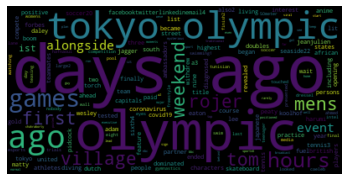

In [23]:
# To generate the wordcloud 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(text_clean)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

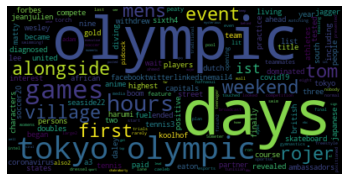

In [24]:
### By adding some more stops words in list 
wordcloud = WordCloud(stopwords=set(list(STOPWORDS)+['day','ai','ago','hour'])).generate(text_clean)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Here we are trying a different method to clean text. We are taking only nouns and making text lower case

In [25]:
nltk.download('averaged_perceptron_tagger')
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(text)
nouns = [word.lower() for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
text_noun = " ".join(nouns)

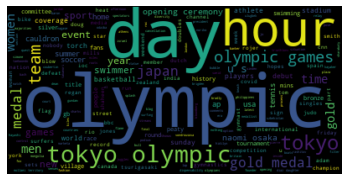

In [27]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text_noun)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

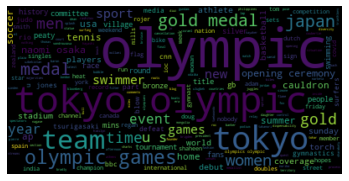

In [28]:
### By adding some more stops words in list
wordcloud = WordCloud(stopwords=set(list(STOPWORDS)+['day','ai','ago','hour','hours','days'])).generate(text_noun)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Visualization of the unigram, bigram, and trigram on the text data

To visualize the n-grams. We will start extracting N-Gram features and see their distribution. N-Gram is used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means the 2-worded phrase, and trigram means 3-worded phrase. This helps us to understand which words most occur together and make our text cleaner and understanding the text distribution.

ago 100
olympic 78
olympics 56
tokyo 56
days 40
hours 33
day 32
games 21
gold 19
medal 18
team 16
2020 13
japan 11
year 11
women 10
men 9
opening 8
won 8
time 8
final 7


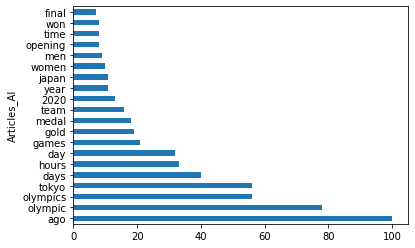

In [31]:
### Visualizing unigrams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from plotly.offline import iplot
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(descriptions, 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Articles_AI' , 'count'])
df2.groupby('Articles_AI').sum()['count'].sort_values(ascending=False).plot(
    kind='barh');

days ago 39
hours ago 33
tokyo olympics 22
day ago 22
olympic games 15
ago tokyo 13
gold medal 10
tokyo 2020 8
ago olympic 7
opening ceremony 6
naomi osaka 6
olympic cauldron 5
olympic gold 5
year old 5
summer olympics 4
2020 olympic 4
tokyo olympic 4
22 hours 4
tokyo ap 4
team usa 4


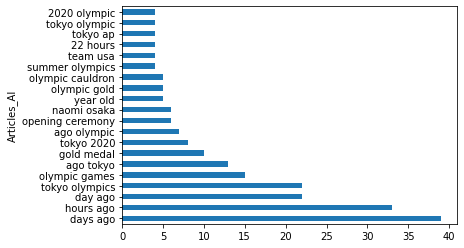

In [34]:
## Visualizing bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(descriptions, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Articles_AI' , 'count'])
df4.groupby('Articles_AI').sum()['count'].sort_values(ascending=False).plot(
    kind='barh');

days ago tokyo 6
days ago olympic 4
tokyo 2020 olympic 4
22 hours ago 4
ago tokyo ap 4
day ago tokyo 4
ago naomi osaka 3
2020 olympic games 3
tokyo olympic games 3
21 year old 3
hours ago tokyo 3
opening ceremony tokyo 3
ago olympic games 3
2020 tokyo olympics 2
hours ago olympic 2
hours ago naomi 2
day ago olympics 2
olympic gold medal 2
hours ago time 2
international olympic committee 2


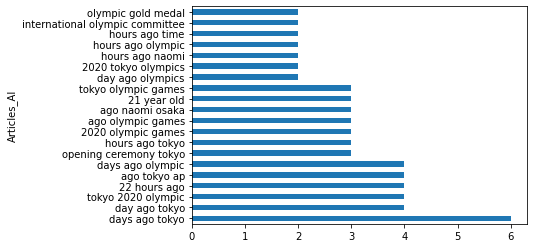

In [36]:
## Visualizing trigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(descriptions, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Articles_AI' , 'count'])
df4.groupby('Articles_AI').sum()['count'].sort_values(ascending=False).plot(
    kind='barh');

### Let us see the most occuring POS tag in our corpus

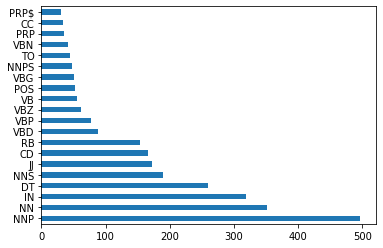

In [37]:
## Let us see which POS is most occuring 
from textblob import TextBlob
blob = TextBlob(str(descriptions))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='barh');

### Name entity Recognition

Named Entity Recognition (NER) is a standard NLP problem that involves spotting named entities (people, places, organizations, etc.) from a chunk of text, and classifying them into a predefined set of categories.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
## Here we preprocess the word by tokenizing it and then tagging its parts of speech i.e. POS
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
sent = preprocess(text_clean)
sent

In [ ]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

In [ ]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

In [ ]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text_clean)))
print(ne_tree)

What it means ?

 - B-NP : beginning of a noun phrase

 - I-NP : descibes that the word is inside of the current noun phrase.

 - O : end of the sentence.

 - B-VP and I-VP : beginning and inside of a verb phrase.

### Sentiment analyisis with Textblob

In [38]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in descriptions]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [39]:
sentiment_scores_tb = [(TextBlob(article).sentiment.polarity) for article in descriptions]

In [40]:
sentiment=pd.DataFrame()
sentiment['article']=descriptions
sentiment['sentiments']=sentiment_category_tb
sentiment['polarity']=sentiment_scores_tb

In [51]:
sentiment

,article,sentiments,polarity
0,5 days ago · The Olympic cauldron is lit durin...,neutral,0.000000
1,4 days ago · Majorities in multiple countries ...,neutral,0.000000
2,5 days ago · The Tokyo Games will be held with...,positive,0.600000
3,"6 hours ago · Inside the Olympic bubble, the s...",positive,0.250000
4,21 mins ago · Takanori Nagase has won Japan's ...,neutral,0.000000
...,...,...,...
95,1 day ago · CAELEB DRESSEL TOUCHED the wall in...,positive,0.071429
96,2 days ago · TOKYO (AP) — Nobody was watching ...,neutral,0.000000
97,"2 days ago · In 2019, Intel presented its even...",neutral,0.000000
98,6 hours ago · Even a normal Olympic Games broa...,positive,0.170833


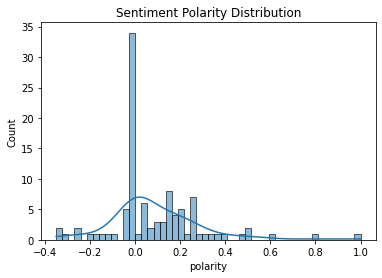

In [42]:
sns.histplot(data=sentiment, x="polarity", 
             bins=50, kde=True).set(title='Sentiment Polarity Distribution');

In [45]:
print('Review with the most positive sentiment polarity: \n')
cl = sentiment.loc[sentiment.polarity == max(sentiment.polarity), ['article']].sample().values
for c in cl:
    print(c[0])

Review with the most positive sentiment polarity: 

1 day ago · Some of the world's best players have come to Tokyo to fight for the gold medal at the Olympic Games. Home. The basketball stars at the...


In [46]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = sentiment.loc[sentiment.polarity == 0, ['article']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

6 days ago · His comments came on the same day International Olympic Committee (IOC) president Thomas Bach said cancellation was "never an option".
1 day ago · "They've been known to nudge people's boats," says Olympic kayaker Jo Brigden-Jones, "the bull sharks". "When you see a big splash you know...
21 mins ago · Takanori Nagase has won Japan's fifth gold medal in judo at the Tokyo Olympics, beating Mongolia's Saeid Mollaei in the final of the men's 81-...
22 hours ago · Dutch men's doubles tennis players Jean-Julien Rojer and partner Wesley Koolhof withdrew from the Olympics after Rojer became the sixth...
7 hours ago · The first-ever Olympic medals for surfing will be handed out later in the day local time, while Simone Biles and the American women's gymnastic team go for gold...


In [48]:
print('Review with the most negative sentiment polarity: \n')
cl = sentiment.loc[sentiment.polarity == min(sentiment.polarity), ['article']].sample().values
for c in cl:
    print(c[0])

Review with the most negative sentiment polarity: 

1 day ago · She then shocked two-time Olympic gold medalist Jade Jones in the round-of-16, beating the British champion 16-12. She went on to defeat Zhou...
